Задание 9.11, Модуль 13(HW-01), Кррючков А.В., группа DSPR178

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
%matplotlib inline
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(labels ='RowNumber', axis =1)
display(churn_data.head(10))
#churn_data.info()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


9.1 Найдем соотношение ушедших и лояльных клиентов

Exited
0    7963
1    2037
Name: count, dtype: int64

Text(0.5, 1.0, 'Соотношение лояльных и ушедших клиентов\nОбщее число клиентов 10000 человек')

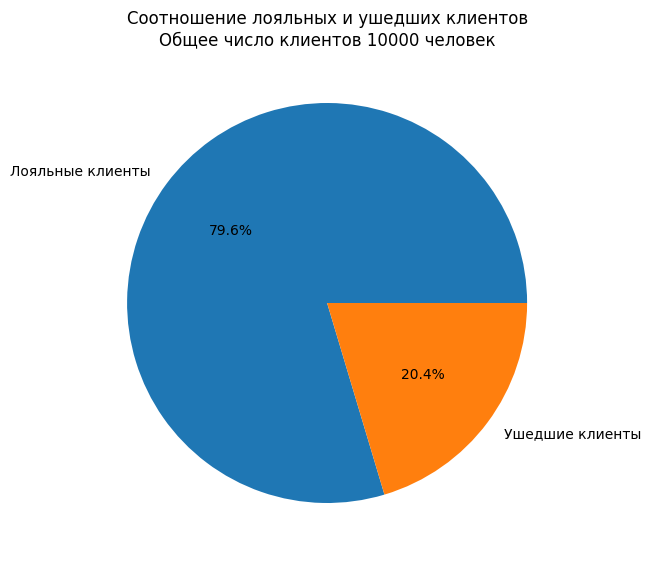

In [261]:
exited = churn_data['Exited'].value_counts()
#display(exited)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%'
);
axes.set_title(label = f'Соотношение лояльных и ушедших клиентов\nОбщее число клиентов {exited.sum()} человек')

Описание: Соотношение лояльных и ушедших клиентов примерно 4:1. Пятая часть клиентов отказалоась от использования продуктов банка.

9.2. Строим график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.

Text(0, 0.5, 'Количество клиентов')

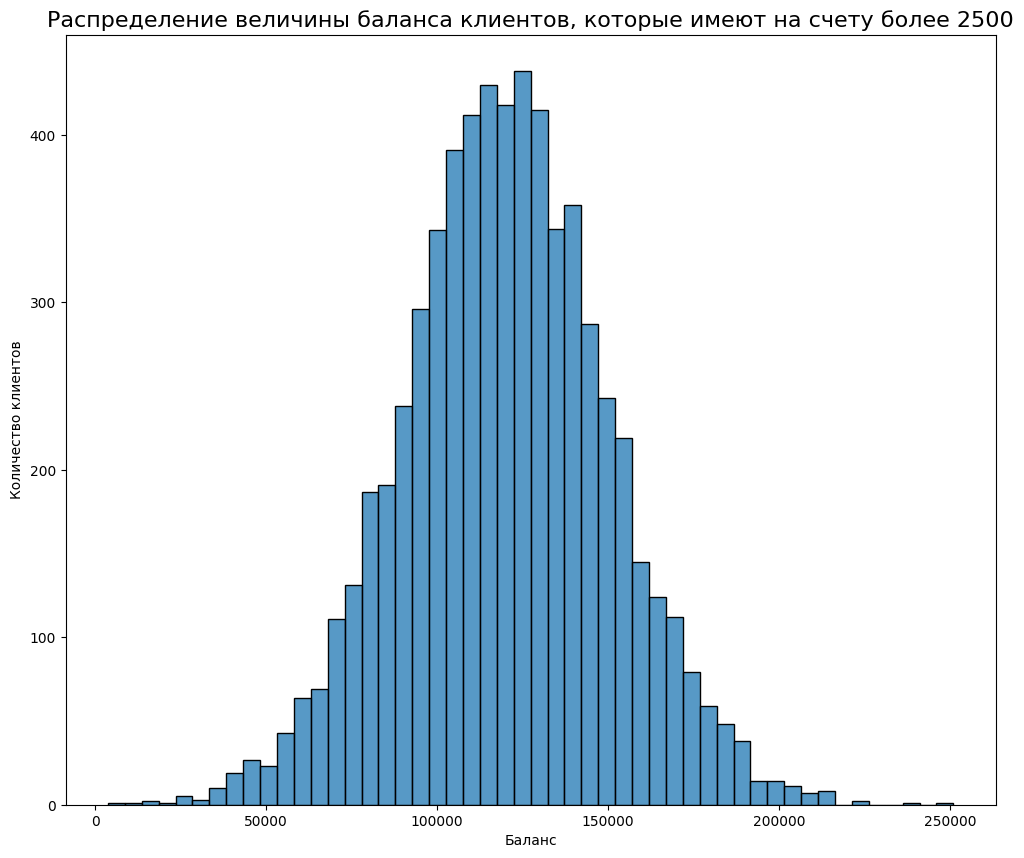

In [112]:
fig = plt.figure(figsize=(12, 10))
histplot1 = sns.histplot(
    data=churn_data[churn_data['Balance']>2500], 
    x='Balance', 
    bins=50
)
histplot1.set_title('Распределение величины баланса клиентов, которые имеют на счету более 2500', fontsize=16)
histplot1.set_xlabel('Баланс')
histplot1.set_ylabel('Количество клиентов')

У клиентов с балансом более 2500 основная часть клиентов хранит на счетах от 100000 до 150000 долларов. Эти клиенты приносят основную прибыль банку.
Распределение баланса клиентов соответствует нормальному распределению.

9.3 Составим график распределения баланса клиентов в разрезе признака оттока

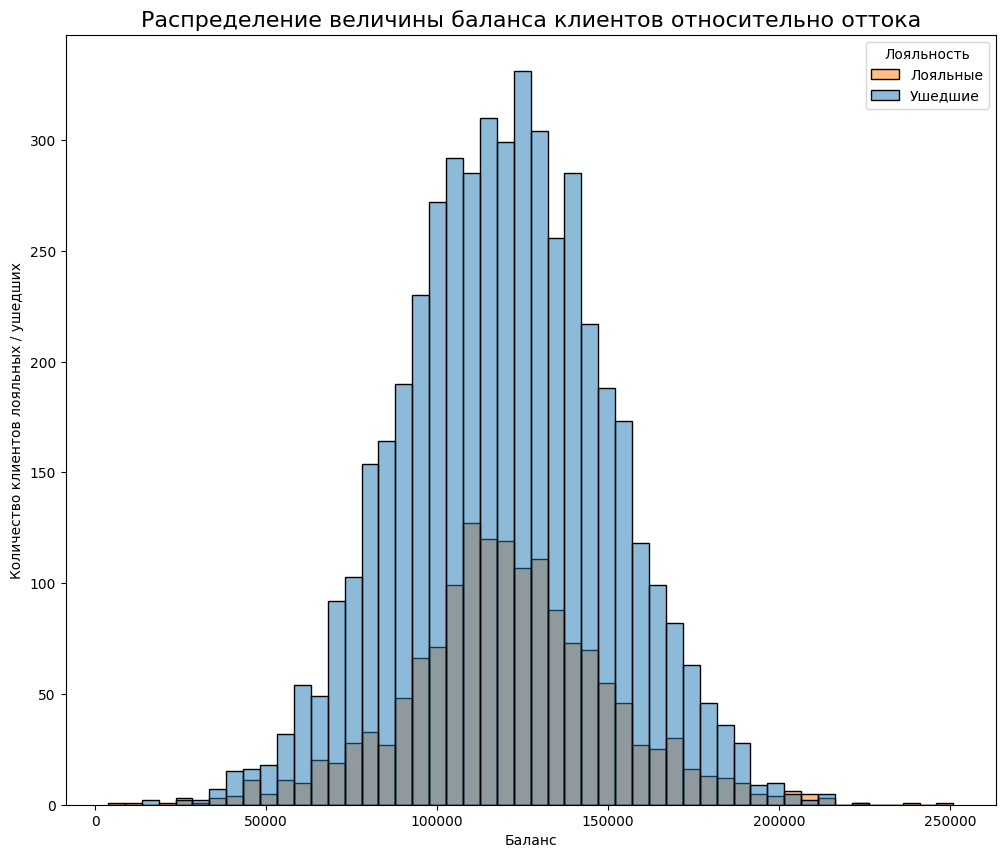

In [144]:
fig = plt.figure(figsize=(12, 10))
histplot = sns.histplot(
    data=churn_data[churn_data['Balance']>2500], 
    x='Balance',
    hue='Exited',
    bins=50,
    
)
histplot.set_title('Распределение величины баланса клиентов относительно оттока', fontsize=16)
histplot.set_xlabel('Баланс')
histplot.set_ylabel('Количество клиентов лояльных / ушедших')
histplot.legend(title="Лояльность", labels=["Лояльные", "Ушедшие"])

In [ ]:
Около 1000 клиентов хранивших на счетах в банке от 100000 до 150000 долларов ушли.
Распределение баланса ушедших и лояльных клиентов, в принципе, соответствует нормальному распределению.
Возможно клиентов не устраивает условия по вкладам в этой категории или качество обслуживания, альтернативные предложения от конкурентов.

9.4 Построим график распределение возраста клиентов в разрезе признака оттока

<Figure size 2000x2000 with 0 Axes>

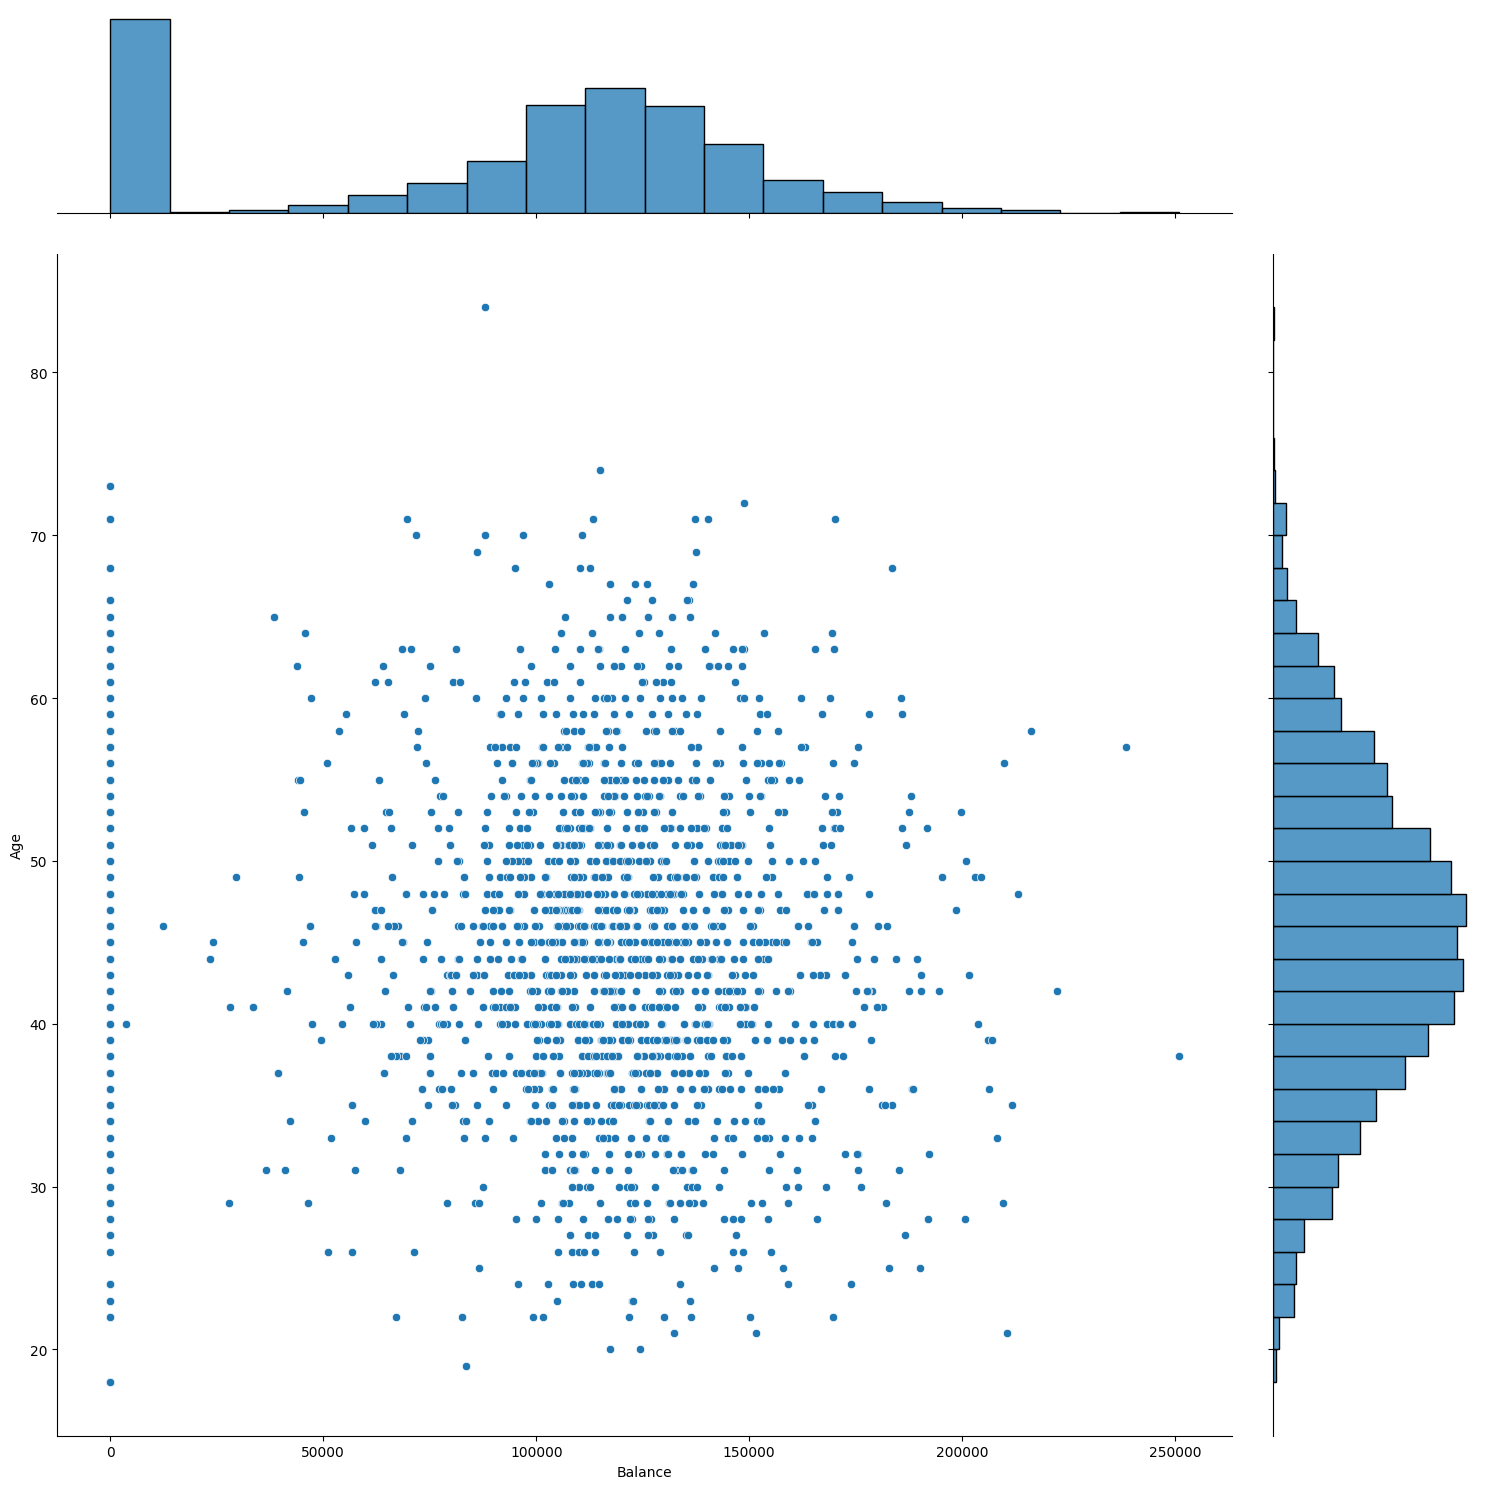

In [227]:
fig = plt.figure(figsize=(20, 20))
jointplot = sns.jointplot(
    data=churn_data[churn_data['Exited']==1],
    x='Balance',
    y='Age',
    height=15
)

Среди ушедших клиентов наибольше выбросы 36-38 и 46-48 лет. Нужно обратьти внимание на группу возрастов от 36 до 57 лет как с наибольшим разбросом. Эти клиенты находятся в возрасте наибольших деловой активности и накопленного опыта. Склонны быстро мониторить рынок подобных услуг и находить конкурентные альтернативы. 

9.5. Построим график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты

In [133]:
fig = px.scatter(
    data_frame=churn_data,
    x="CreditScore",
    y="EstimatedSalary",
    color='Exited',
    labels={'CreditScore': 'Кредитный рейтинг', 'EstimatedSalary': 'Предполагаемая зарплата', 'Exited': 'Ушедшие'},
    title='Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты'
)
fig.show()

In [ ]:
Явной взаимосвязи не видно. Ушедшие и лояльные клиенты достаточно равномерно распеределены по полю графика.

In [ ]:
9.6. Построим график взаимосвязи полового признака и оттока

In [226]:
bar_data = churn_data.groupby(by='Gender', as_index=False)['Exited'].value_counts()
bar_data['Norm'] = bar_data['count'] / bar_data['count'].sum()
display(bar_data)
fig = px.bar(
    data_frame=bar_data,
    x="Gender",
    y="Norm",
    color='Exited',
    text = 'Norm',
    orientation='v',
    labels={'Gender': 'Пол клиентов', 'Norm': 'Доля лояльных / ушедших клиентов','Exited': 'Ушедшие' },
    title='Взаимосвязь пола клиента и оттока'
)
fig.show()

,Gender,Exited,count,Norm
0,Female,0,3404,0.3404
1,Female,1,1139,0.1139
2,Male,0,4559,0.4559
3,Male,1,898,0.0898


Чаще уходят женщины как в абсолютном выражении, так и относительно общего числа клиентов.

9.7. Построим график оттока клиентов в зависимости от числа приобретённых у банка услуг

[Text(0, 0, '1409'), Text(0, 0, '348'), Text(0, 0, '220'), Text(0, 0, '60')]

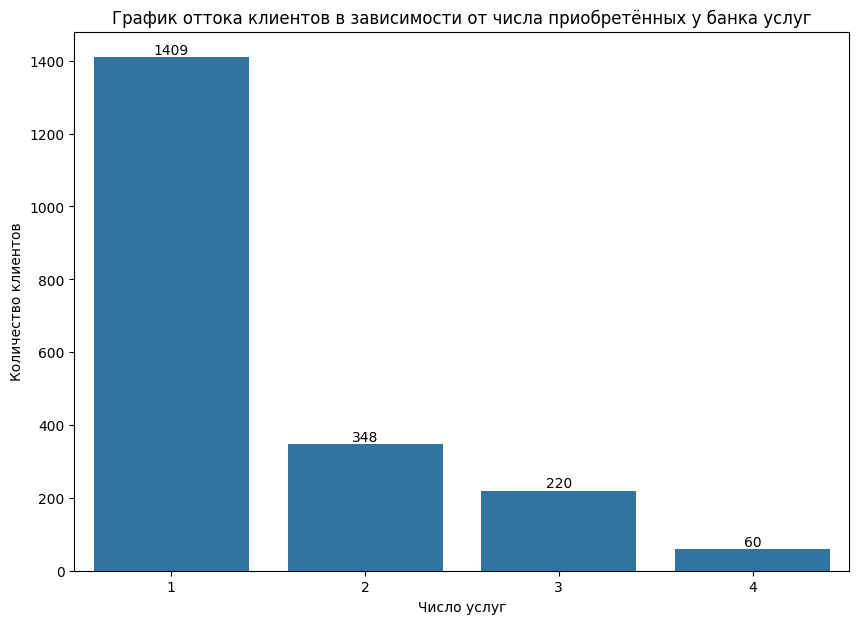

In [253]:
bar_data_1 = churn_data.groupby(by='NumOfProducts', as_index=False)['Exited'].value_counts()
#display(bar_data_1)
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=bar_data_1[bar_data_1['Exited']==1],
    x='NumOfProducts',
    y='count',
    
)
barplot.set_title('График оттока клиентов в зависимости от числа приобретённых у банка услуг');
barplot.set_xlabel('Число услуг')
barplot.set_ylabel('Количество клиентов')
barplot.bar_label(barplot.containers[0])

Ушедшие клиенты в основном пользовались одной услугой. Таких зафиксировано 1409 человек. 

9.8. Построим функцию, показывающую влияние наличие статуса активного клиента на отток клиентов

IsActiveMember
0    1302
1     735
Name: count, dtype: int64

Text(0.5, 1.0, 'Соотношение неактивных и активных клиентов среди ушедших\nОбщее число ушедших клиентов 2037 человек')

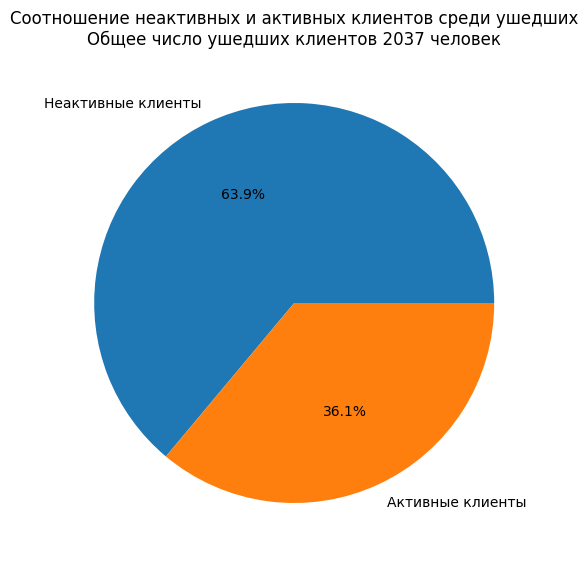

In [270]:
pie_data = churn_data[churn_data['Exited']==1]['IsActiveMember'].value_counts()
display(pie_data)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    pie_data,
    labels=['Неактивные клиенты', 'Активные клиенты'],
    autopct='%.1f%%'
);
axes.set_title(label = f'Соотношение неактивных и активных клиентов среди ушедших\nОбщее число ушедших клиентов {pie_data.sum()} человек')

Из ушедших клиентов почти 64% были неактивными. Возможно нужно ввести дополнительные бонусы за увеличение активности клиента, проанализировать критерии присвоения статуса Активный и возможно пресмотреть их.

9.9. Построим картограмму, в какой стране доля ушедших клиентов больше

In [288]:
country_data = churn_data[churn_data['Exited']==1].groupby('Geography', as_index=False)['Exited'].value_counts()
country_data['Norm'] = country_data['count'] * 100 / country_data['count'].sum()
display(country_data)
fig = px.choropleth(
    data_frame=country_data, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Norm", #от чего зависит цвет
    #animation_frame="date", #анимационный бегунок
    range_color=[0, 100], #диапазон цвета
    title='Распределение ушедших клиентов по странам мира', #заголовок
    labels={'Norm': 'Доля ушедших клиентов, %' },
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

fig.show()

,Geography,Exited,count,Norm
0,France,1,810,39.764359
1,Germany,1,814,39.960727
2,Spain,1,413,20.274914


Наибольший процент ушедших клиентов в Германии. Возможно это из-за кризиса в экономике Германии.

In [ ]:
9.10. Построим тепловую карту зависимости доли ушедших пользователей от категории кредитного рейтинга и срока пользования услугами банка

In [308]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot_data = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    fill_value=0
).round(2)
display(pivot_data)

fig = px.imshow(
    pivot_data,
    text_auto=True,
    aspect="auto",
    labels=dict(x='Срок пользованиия услугами, лет', y='Категории кредитного рейтинга', color="Доля ушедших пользователей")
    )
fig.show()    

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.28,0.21,0.14,0.17,0.13,0.23,0.24,0.13,0.20,0.27,0.25
Fair,0.22,0.22,0.21,0.22,0.20,0.21,0.24,0.17,0.21,0.19,0.21
Good,0.20,0.20,0.19,0.21,0.20,0.21,0.18,0.19,0.15,0.19,0.20
Poor,0.23,0.26,0.21,0.21,0.23,0.20,0.18,0.15,0.21,0.25,0.17
Very_Poor,0.44,0.25,0.15,0.29,0.29,0.15,0.23,0.21,0.25,0.23,0.33


Чаще всего уходят клиенты с категегорией кредитного рейтинга Very_Poor. Такие наблюдаются и на первом и на 10-м году пользования услугами банка.